# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [61]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [62]:

#lists to add data during loop
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list =[]
wind_speed_list =[]
country_list =[]
date_list =[]


print("Beginning Data Retrieval")
print("-------------------------------")


url = "http://api.openweathermap.org/data/2.5/weather?"

record_number = 0
set_number = 1

for city in cities:

    try:

        record_number = record_number + 1
    
    

        query_url = f"{url}appid={weather_api_key}&units=imperial&q={city}"
        response = requests.get(query_url).json()

        #Filling out lists

        city_list.append(response['name'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp_list.append(response['main']['temp_max'])
        humidity_list.append(response['main']['humidity'])
        cloudiness_list.append(response['clouds']['all'])
        wind_speed_list.append(response['wind']['speed'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])

        city_name = response['name']


        if record_number == 51:
            record_number = 1
            set_number = set_number + 1

        print(f"Processing Record {record_number} of set {set_number}| {city_name}")

        


    except:
        record_number = record_number - 1
        print("City not found. Skipping...")


print("------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------")

                

ng Record 9 of set 3| Berdigestyakh
Processing Record 10 of set 3| New Norfolk
Processing Record 11 of set 3| Gizo Government Station
Processing Record 12 of set 3| Salalah
Processing Record 13 of set 3| Baní
Processing Record 14 of set 3| Berlevåg
Processing Record 15 of set 3| Cartagena
Processing Record 16 of set 3| Manado
Processing Record 17 of set 3| Broome
Processing Record 18 of set 3| Leh
Processing Record 19 of set 3| Boueni
Processing Record 20 of set 3| Lerwick
Processing Record 21 of set 3| Cockburn Town
Processing Record 22 of set 3| Port Elizabeth
Processing Record 23 of set 3| Biak
Processing Record 24 of set 3| Kaitangata
Processing Record 25 of set 3| Carnarvon
Processing Record 26 of set 3| Bonga
Processing Record 27 of set 3| Lompoc
Processing Record 28 of set 3| Ust'-Omchug
Processing Record 29 of set 3| Acaraú
Processing Record 30 of set 3| Brookhaven
Processing Record 31 of set 3| Olinda
Processing Record 32 of set 3| Altay
Processing Record 33 of set 3| Mar del 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:

data_dict = {"City":city_list, "Lat": lat_list, "Lng":lng_list, "Max Temp":max_temp_list, "Humidity": humidity_list, "Cloudiness": cloudiness_list,"Wind speed": wind_speed_list,"Country":country_list, "Date":date_list }

#Data frame from dictionary.
weather_data_df.to_csv(output_data_file)
weather_data_df = pd.DataFrame (data_dict)
weather_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,19.821346,19.641452,69.839825,71.330420,55.701049,7.192448,1.624741e+09
std,32.885920,90.685274,14.653020,20.092106,39.980246,5.157813,2.621683e+02
min,-54.800000,-179.166700,31.550000,8.000000,0.000000,0.000000,1.624740e+09
25%,-6.365125,-57.638750,59.692500,62.000000,12.000000,3.520000,1.624741e+09
50%,21.795950,20.102800,72.150000,76.000000,66.000000,5.750000,1.624741e+09
75%,46.476525,100.378650,80.035000,86.000000,98.000000,10.037500,1.624741e+09
max,78.218600,179.316700,110.120000,100.000000,100.000000,30.600000,1.624741e+09


In [64]:
weather_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date
0,Tazovsky,67.4667,78.7000,40.68,72,0,10.63,RU,1624741089
1,Ushuaia,-54.8000,-68.3000,38.86,70,0,0.00,AR,1624740260
2,Hofn,64.2539,-15.2082,53.26,60,48,10.85,IS,1624740576
3,Rikitea,-23.1203,-134.9692,74.53,76,3,10.71,PF,1624740506
4,Hastings,50.8552,0.5729,62.33,90,100,13.53,GB,1624741067
...,...,...,...,...,...,...,...,...,...
567,Banikoara,11.2985,2.4386,79.43,70,62,5.84,BJ,1624741362
568,Shaoyang,27.2315,111.4525,76.35,91,97,4.07,CN,1624741362
569,Bolshaya Dzhalga,45.9695,42.6966,72.93,86,54,11.48,RU,1624741363
570,Kirakira,-10.4544,161.9205,79.84,79,91,12.35,SB,1624741363


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [65]:
#  Get the indices of cities that have humidity over 100%.
index_humidity = weather_data_df[ weather_data_df['Humidity'] >100 ].index

In [67]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data_df.drop(index_humidity, inplace = False)
clean_city_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date
0,Tazovsky,67.4667,78.7000,40.68,72,0,10.63,RU,1624741089
1,Ushuaia,-54.8000,-68.3000,38.86,70,0,0.00,AR,1624740260
2,Hofn,64.2539,-15.2082,53.26,60,48,10.85,IS,1624740576
3,Rikitea,-23.1203,-134.9692,74.53,76,3,10.71,PF,1624740506
4,Hastings,50.8552,0.5729,62.33,90,100,13.53,GB,1624741067
...,...,...,...,...,...,...,...,...,...
567,Banikoara,11.2985,2.4386,79.43,70,62,5.84,BJ,1624741362
568,Shaoyang,27.2315,111.4525,76.35,91,97,4.07,CN,1624741362
569,Bolshaya Dzhalga,45.9695,42.6966,72.93,86,54,11.48,RU,1624741363
570,Kirakira,-10.4544,161.9205,79.84,79,91,12.35,SB,1624741363


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

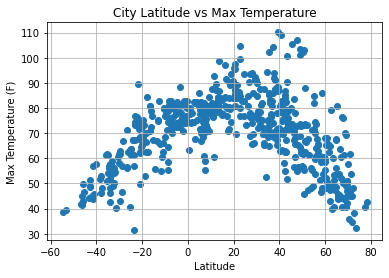

In [73]:
latitude = clean_city_data["Lat"]
temperature = clean_city_data["Max Temp"]
plt.scatter(latitude, temperature)

#Add tittle and labels

plt.title ("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save as .png

plt.savefig("output_data/latitude_vs_temperature.png")

## Latitude vs. Humidity Plot

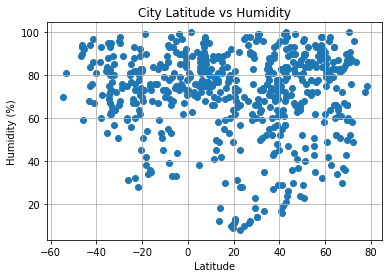

In [74]:
latitude = clean_city_data["Lat"]
humidity = clean_city_data["Humidity"]
plt.scatter(latitude, humidity)

#Add tittle and labels

plt.title ("City Latitude vs Humidity" )
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save as .png

plt.savefig("output_data/latitude_vs_humidity.png")

## Latitude vs. Cloudiness Plot

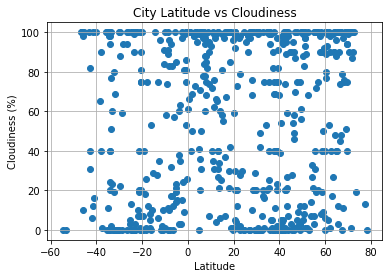

In [75]:
latitude = clean_city_data["Lat"]
cloudiness = clean_city_data["Cloudiness"]
plt.scatter(latitude, cloudiness)

#Add tittle and labels

plt.title ("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save as .png

plt.savefig("output_data/latitude_vs_cloudiness.png")

## Latitude vs. Wind Speed Plot

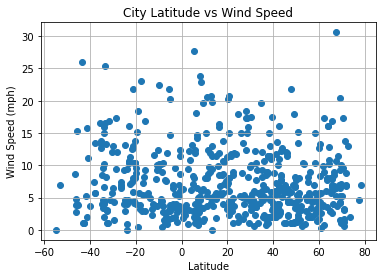

In [77]:
latitude = clean_city_data["Lat"]
wind_speed = clean_city_data["Wind speed"]
plt.scatter(latitude, wind_speed)

#Add tittle and labels

plt.title ("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save as .png

plt.savefig("output_data/latitude_vs_wind_speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.36958567935341374


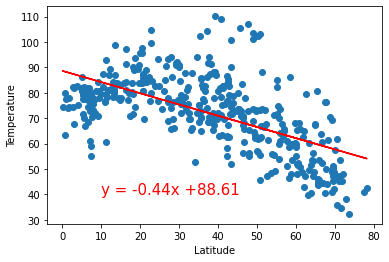

In [103]:

# Perform a linear regression on max temperature vs. latitude

#Create northern hemisphere data

n_hemisphere = clean_city_data[clean_city_data["Lat"] > 0]


latitude = n_hemisphere["Lat"]
temperature = n_hemisphere ["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude, temperature)

# Get regression values
regress_values = latitude * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(latitude, temperature)
plt.plot(latitude,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,xy=(10,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6602843503876444


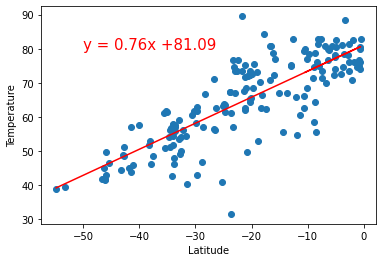

In [106]:
#Create southern hemisphere data

s_hemisphere = clean_city_data[clean_city_data["Lat"] < 0]


latitude = s_hemisphere["Lat"]
temperature = s_hemisphere ["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude, temperature)

# Get regression values
regress_values = latitude * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(latitude, temperature)
plt.plot(latitude,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,xy=(-50,80),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00015004577679241684


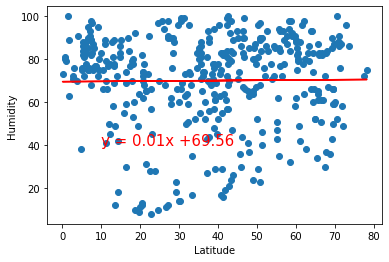

In [113]:
#Create north hemisphere data

n_hemisphere = clean_city_data[clean_city_data["Lat"] > 0]


latitude = n_hemisphere["Lat"]
humidity = n_hemisphere ["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude, humidity)

# Get regression values
regress_values = latitude * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(latitude, humidity)
plt.plot(latitude,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,xy=(10,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00612534357601751


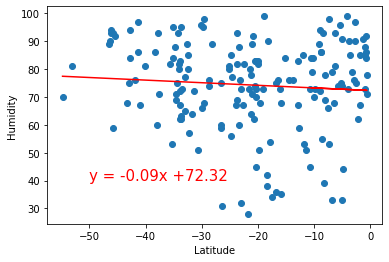

In [115]:
#Create southern hemisphere data

s_hemisphere = clean_city_data[clean_city_data["Lat"] < 0]


latitude = s_hemisphere["Lat"]
humidity= s_hemisphere ["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude, humidity)

# Get regression values
regress_values = latitude * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(latitude, humidity)
plt.plot(latitude,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,xy=(-50,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00016681772600428654


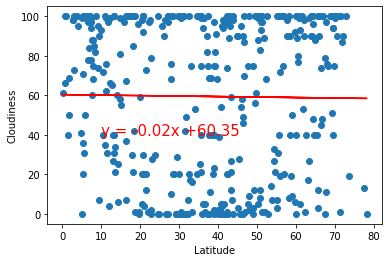

In [116]:
#Create north hemisphere data

n_hemisphere = clean_city_data[clean_city_data["Lat"] > 0]


latitude = n_hemisphere["Lat"]
cloudiness = n_hemisphere ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude, cloudiness)

# Get regression values
regress_values = latitude * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(latitude, cloudiness)
plt.plot(latitude,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,xy=(10,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0017677318222187725


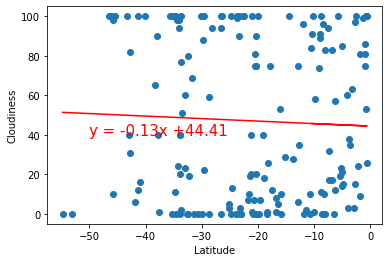

In [118]:
#Create southern hemisphere data

s_hemisphere = clean_city_data[clean_city_data["Lat"] < 0]


latitude = s_hemisphere["Lat"]
cloudiness= s_hemisphere ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude, cloudiness)

# Get regression values
regress_values = latitude * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(latitude, cloudiness)
plt.plot(latitude,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,xy=(-50,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00699085295502082


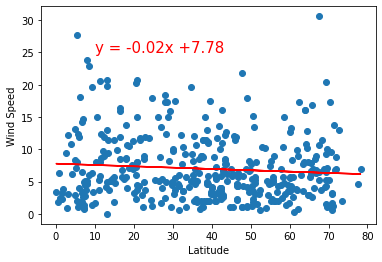

In [121]:
#Create north hemisphere data

n_hemisphere = clean_city_data[clean_city_data["Lat"] > 0]


latitude = n_hemisphere["Lat"]
wind_speed = n_hemisphere ["Wind speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude, wind_speed)

# Get regression values
regress_values = latitude * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(latitude, wind_speed)
plt.plot(latitude,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,xy=(10,25),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.008291783367814333


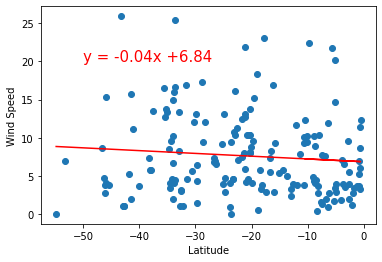

In [123]:
#Create southern hemisphere data

s_hemisphere = clean_city_data[clean_city_data["Lat"] < 0]


latitude = s_hemisphere["Lat"]
wind_speed= s_hemisphere ["Wind speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude,wind_speed)

# Get regression values
regress_values = latitude * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(latitude, wind_speed)
plt.plot(latitude,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,xy=(-50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()